In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk

In [2]:
train=pd.read_csv('D:/Fake_News_Detection-master/Fake_news/App/dataset/train.csv')
test=pd.read_csv('D:/Fake_News_Detection-master/Fake_news/App/dataset/test.csv')



In [38]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [39]:
print('Label distribution in training set:')
print(train['label'].value_counts())

Label distribution in training set:
label
1    10413
0    10387
Name: count, dtype: int64


In [40]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


In [41]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

# Creating Wordcloud Visuals

In [6]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in train[train['label']==1].total:

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total:

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    fake_words += " ".join(tokens)+" "

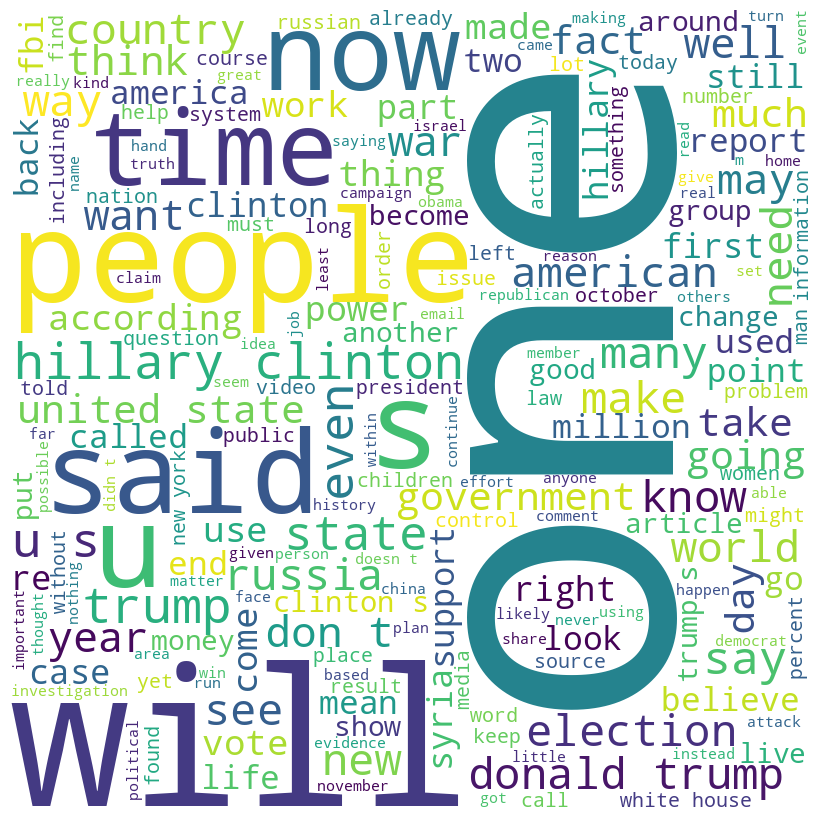

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(real_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Cleaning and preprocessing

# 1. Regex

In [7]:
#Remove punctuations from the String
s = """!</> hello $$ </>^H!!!%i%&%$@@@^^^&&!& </>*to@# &&\ @@@Mr##%^^&!@# %%$"""

<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:2: SyntaxWarning: invalid escape sequence '\ '
C:\Users\acern\AppData\Local\Temp\ipykernel_20128\3116292767.py:2: SyntaxWarning: invalid escape sequence '\ '
  s = "!</> hello $$ </>^H!!!%i%&%$@@@^^^&&!& </>*to@# &&\ @@@Mr##%^^&!@# %%$"


In [8]:
s = re.sub(r'[^\w\s]','',s)

In [9]:
print(s)

 hello  Hi to  Mr 


# 2. Tokenization

In [10]:
#Downloading nltk data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acern\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acern\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:

nltk.word_tokenize("Hello how are you")


['Hello', 'how', 'are', 'you']

# 3. StopWords

In [12]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [13]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [14]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [15]:
words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

# 4. Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str=str("been had done languages cities mice")

In [17]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


# Let's Apply

In [18]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''

    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning

    words = nltk.word_tokenize(sentence) #tokenization

    words = [w for w in words if not w in stop_words]  #stopwords removal

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    train.loc[index,'total'] = filter_sentence


In [19]:
train = train[['total','label']]

# Applying NLP Techniques

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
X_train = train['total']
Y_train = train['label']

# Bag-of-words / CountVectorizer

In [22]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [23]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# TF-iDF Vectorizer

In [24]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [25]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [26]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

# Let's Apply

In [27]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [28]:
tf_idf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5987978 stored elements and shape (20800, 220412)>

# Modelling

In [29]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

# Logistic Regression

In [30]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


array([[2494,   70],
       [  51, 2585]], dtype=int64)

# MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 852, 1784]], dtype=int64)

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
    def clean_text(self, text):
        text = re.sub(r'[^\w\s]', '', text)
        words = nltk.word_tokenize(text)
        words = [w for w in words if w.lower() not in self.stop_words]
        words = [self.lemmatizer.lemmatize(w.lower()) for w in words]
        return ' '.join(words)
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if not isinstance(X, pd.Series):
            X = pd.Series(X)
        return X.apply(self.clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acern\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acern\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Pipeline

In [7]:
X_train = train['title'] + ' ' + train['author'] + ' ' + train['text']
Y_train = train['label']

In [8]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:


pipeline = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', LogisticRegression(C=1e5, class_weight='balanced')),
])

In [10]:
pipeline.fit(X_train, Y_train)

TypeError: expected string or bytes-like object, got 'float'

In [ ]:
pipeline.predict(['''flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion'''])

array([0])

In [46]:
#saving the pipeline
filename = 'pipeline_final.sav'
joblib.dump(pipeline, filename)

['pipeline_final.sav']

In [47]:
X_test = test['title'] + ' ' + test['author'] + ' ' + test['text']
# If test labels are available
if 'label' in test.columns:
    Y_test = test['label']
    pred = pipeline.predict(X_test)
    from sklearn.metrics import confusion_matrix, accuracy_score
    print('Confusion Matrix:')
    print(confusion_matrix(Y_test, pred))
    print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred)))

In [48]:
    preds = pipeline.predict(X_test)
    print(preds)

[0 1 1 ... 0 1 0]


In [ ]:
loaded_model = joblib.load('pipeline_final.sav')
result = loaded_model.predict([your_input_text])  # Replace with your actual input
print('Example prediction:', result)

In [49]:
from sklearn.model_selection import train_test_split

X = train['total']
y = train['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
val_preds = pipeline.predict(X_val)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))

Validation Accuracy: 0.9649038461538462
Confusion Matrix:
 [[2064   68]
 [  78 1950]]


In [50]:
filename = './pipeline_final.sav'

# Prediction

In [58]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(['Did the plane crashed in building was a airbus.'])
#result = loaded_model.predict(['''National groups are heralding in a new administration led by Donald Trump as he is sworn in as the 45th President of the United States. Susan B. Anthony Lust president Marjorie Dannenfelser said in a statement, EcoWe are pleased to see President Donald Trump and Vice President Pence sworn in today and look forward to immediately working together to advance protections for unbom children and their mothers. 46 Dannenfelser continued: Already, the difference between this administration and its predecessor could not be more clear. President Trump continually surrounds himself with key advisers and personnel who share his commitment to protecting the lives of the vulnerable, as well as taxpayers. We have been impressed by the skill and experience of the team he has put in place during the transition. Together, we will advance a culture of life by fulfilling the commitments made during the campaign. With President Trump and a Congress, we have an historic opportunity to advance policy that will save lives. Dannenfelser served as national chairwoman of Trumpas coalition. As a candidate for the presidency, Trump outlined four policy commitnents in a letter to leaders: 96ceThis is a day of hope for the movement, which has fought so tenaciously to protect unborn children and their mothers in every political climate, à Dannenfelser said. in a letter to supporters, March for Life Action president Tom McCluskey said, abæunder the Obama Administration, our nation saw an unprecedented expansion of government abortion funding, and the prosecution of Americans at like the Little Sisters of the Poor and the staff at the March for Life at because of our beliefs. afatal am hopeful about the incoming Administration, at he continued, accel am optimistic that in these next 100 days, and coming years, we can see a reversal of policies in our government. The new Congress presents the movement with many opportunities to pass legislation and advance a culture of life, at The 44th annual March for Life will be held on Friday, January 27 on the national mall in Washington, D. C. Addressing the tens of thousands of participants expected will be President Trumpåts counselor Kollyanne Conway, a longtime advocate, ätze We are thrilled to have Kellyanne Conway speak at this yearäts March for Life, Jeanne Mancini, March for Life president, said, ScmAs the first female to run a successful presidential campaign and as a steadfast advocate for life and family issues, Kellyanne beautifully embodies the 2017 March for Lifeacs theme, at The Power of One. 26 € Ecelt is our hope that this yearás March for Life will encourage each of us to seek and fulfill our unique mission to the best of our ability because only in doing so we will collectively build a culture of life in the U. 5. 56 a culture where abortion is unthinkable, & Mancini added. The March for Life is the worldae's largest demonstration. It is held each year on or around the anniversary of the Supreme Courtas decision in Roe v. Wade, which legalized abortion in the United States.'''])
print(result)

[1]


In [60]:
# Example: clearly fake news
my_fake_news = "Aliens have landed in New York and are giving out free pizza to everyone."
result = loaded_model.predict([my_fake_news])
print("Prediction:", result)  # 0 = fake, 1 = real

Prediction: [0]
